Initial setup and first topic model run

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import wosis
import pandas as pd
import metaknowledge as mk
import wosis.analysis.plotting as wos_plot

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
# Read in data from temporary cache file
RC = mk.RecordCollection("tmp/filtered_corpora.txt")

In [25]:
hide_columns = ['DE', 'abstract', 'keywords', 'DOI', 'id', 'kws']

In [14]:
from wosis.analysis import find_topics

corpora_df = wosis.rec_to_df(RC)
topic_results = find_topics(corpora_df, num_topics=6)

Topic 1: model parameters sensitivity models data analysis parameter flow time calibration
Topic 2: optimization design method shape topology problem element finite sensitivity structural
Topic 3: life energy cycle environmental emissions production assessment waste lca impact
Topic 4: uncertainty risk stochastic carlo quantification monte uncertainties bayesian probabilistic method
Topic 5: water climate river groundwater quality change management basin hydrological swat
Topic 6: soil moisture soils crop oat content carbon plant erosion organic


In [10]:
# find paper of interest - see if it's still in the corpora
tmp_df = topic_results.corpora_df  
tmp_df.loc[tmp_df.id == 'WOS:000248233200001']

for i in range(topic_results.num_topics):
    topic_id = i + 1
    tmp_topic = topic_results.get_topic_by_id(topic_id)
    print("topic_id", topic_id)
    print(tmp_topic.loc[tmp_topic.id == 'WOS:000248233200001']['id'])

topic_id 1
Series([], Name: id, dtype: object)
topic_id 2
Series([], Name: id, dtype: object)
topic_id 3
Series([], Name: id, dtype: object)
topic_id 4
6626    WOS:000248233200001
Name: id, dtype: object
topic_id 5
Series([], Name: id, dtype: object)
topic_id 6
Series([], Name: id, dtype: object)


In [15]:
subtopic1 = topic_results.get_topic_by_id(1)
subtopic4 = topic_results.get_topic_by_id(4)

In [17]:
model_param_rc = wosis.extract_recs(subtopic1['id'], RC, name='model_param')
uncert_risk_rc = wosis.extract_recs(subtopic4['id'], RC, name='uncert_risk')

In [18]:
from functools import reduce

In [19]:
topics_combined = reduce(lambda x, y: x + y, [model_param_rc, uncert_risk_rc])

In [21]:
topics_combined_df = wosis.rc_to_df(topics_combined)
topics_combined_df.to_csv('../data/topics_combined.csv')

In [22]:
topics_combined_set = find_topics(topics_combined_df, num_topics=5)

Topic 1: model sensitivity parameters analysis data flow models parameter results based
Topic 2: stochastic random polynomial method chaos quantification expansion equations collocation problems
Topic 3: risk exposure assessment health cancer risks human probabilistic dose ecological
Topic 4: uncertainty bayesian uncertainties carlo monte analysis model models data parameter
Topic 5: neural network ann artificial networks prediction models variables regression fuzzy


<hr>

Plotting subtopic trends over time. <br>
Two topics are chosen, papers focusing on applications of SA and papers focusing on theoretical development of SA. <br>
The next task is to superimpose the category trends over time. <br>
Journal publication trends and top cited papers to indicate which fields are applying or interested in the theory of UA/SA. <br>
Author citation networks to indicate which fields are collaborating, and journal networks.

In [30]:
wos_config = wosis.load_config('config.yml')

In [31]:
subtopic1 = topics_combined_set.get_topic_by_id(1)
subtopic4 = topics_combined_set.get_topic_by_id(4)

In [103]:
sa_rc = wosis.extract_recs(subtopic1['id'], RC, name='SA')
ua_rc = wosis.extract_recs(subtopic4['id'], RC, name='UA')

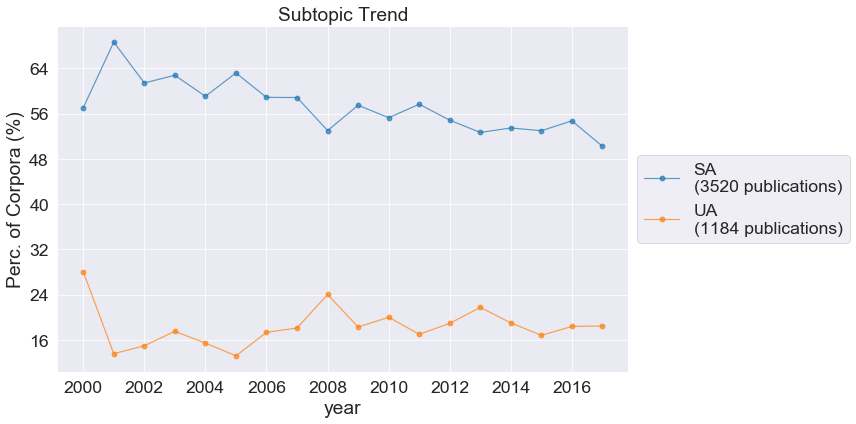

In [104]:
wos_plot.plot_topic_trend([sa_rc, ua_rc], total_rc=topics_combined, title='Subtopic Trend', save_plot_fn='figs/Subtopic Trend Percentage')

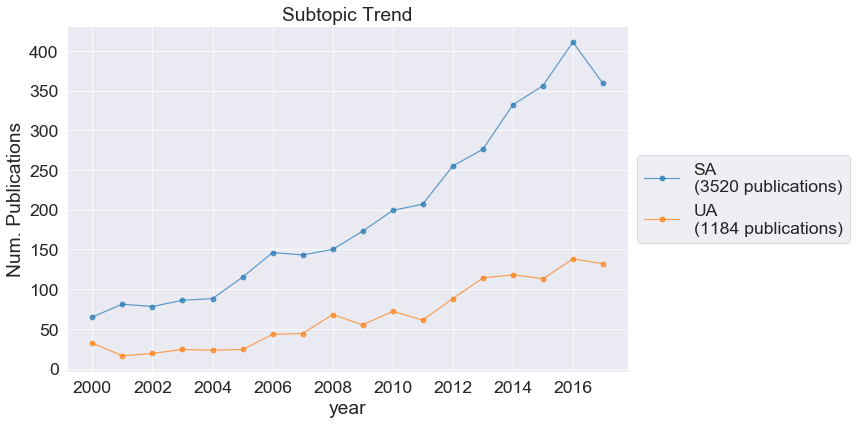

In [105]:
wos_plot.plot_topic_trend([sa_rc, ua_rc], title='Subtopic Trend', save_plot_fn='figs/Subtopic Trend')

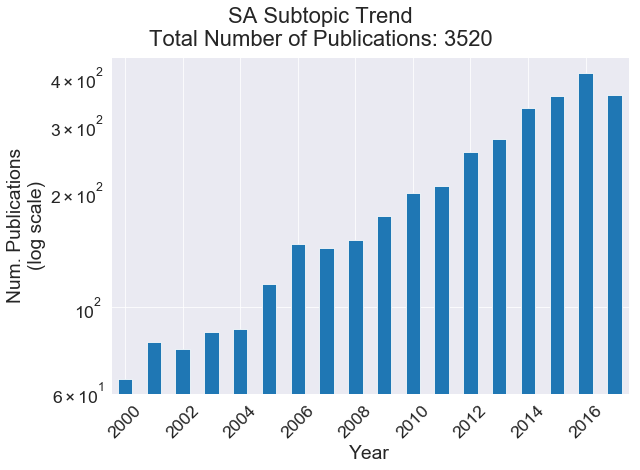

In [106]:
wos_plot.plot_pub_trend(sa_rc, title='SA Subtopic Trend', save_plot_fn='figs/sa_trend_2000-2016.png')

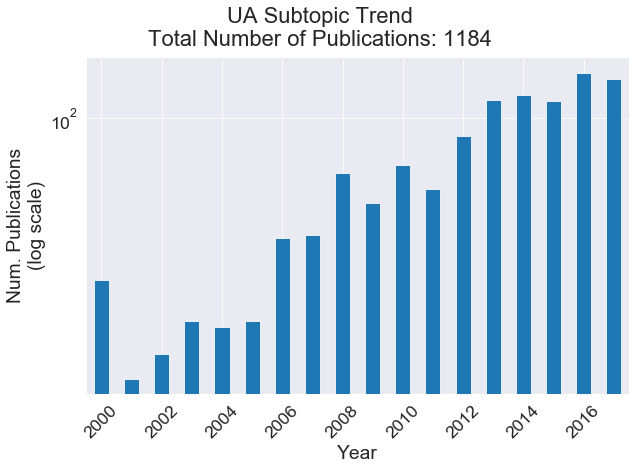

In [107]:
wos_plot.plot_pub_trend(ua_rc, title='UA Subtopic Trend', save_plot_fn='figs/ua_trend_2000-2016.png')

<hr>
Crtieria matching the subtopics

In [108]:
subtopics_combined = reduce(lambda x, y: x + y, [sa_rc, ua_rc])

In [109]:
wosis.rc_to_df(subtopics_combined).to_csv('../data/subtopics_combined.csv')

1. Frameworks and guidelines for UA/SA

In [42]:
framework = wosis.keyword_matches(subtopics_combined, ['framework', 'guideline', 'comparison', 'evalua', 'review', 'critici', 'overview', 'diagnostic'], threshold=95.0)

In [43]:
all_framework = framework.combine_recs()

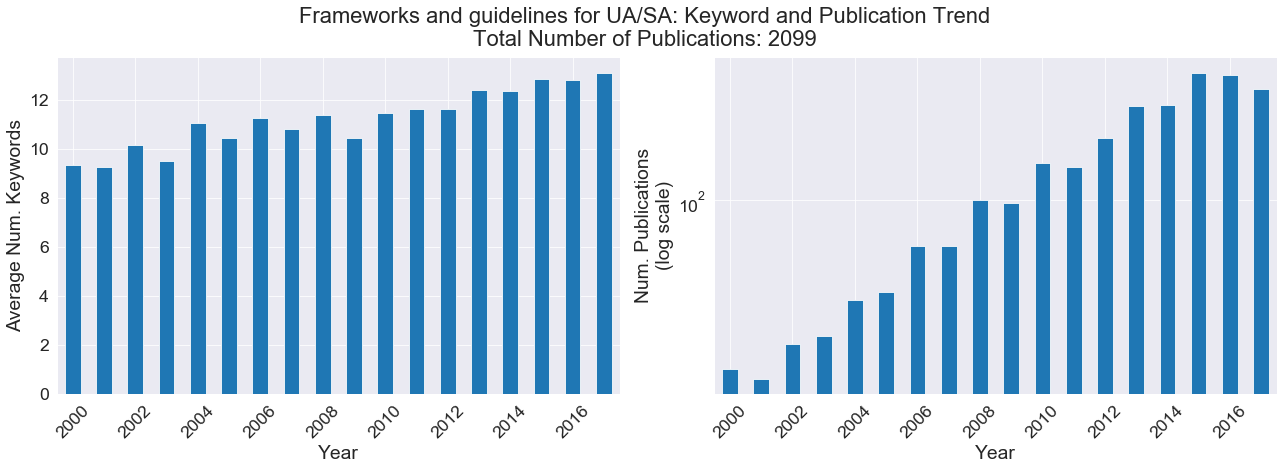

In [44]:
wos_plot.plot_kw_trend(all_framework, title='Frameworks and guidelines for UA/SA: Keyword and Publication Trend', save_plot_fn='figs/framework_pub_trend.png')

2. Applications of UA/SA

In [45]:
applications = wosis.keyword_matches(subtopics_combined, ['appl', 'watershed', 'quantify', 'perform', 'calculate', 'in this study', 'catchment'], threshold=95.0)

In [46]:
all_applications = applications.combine_recs()

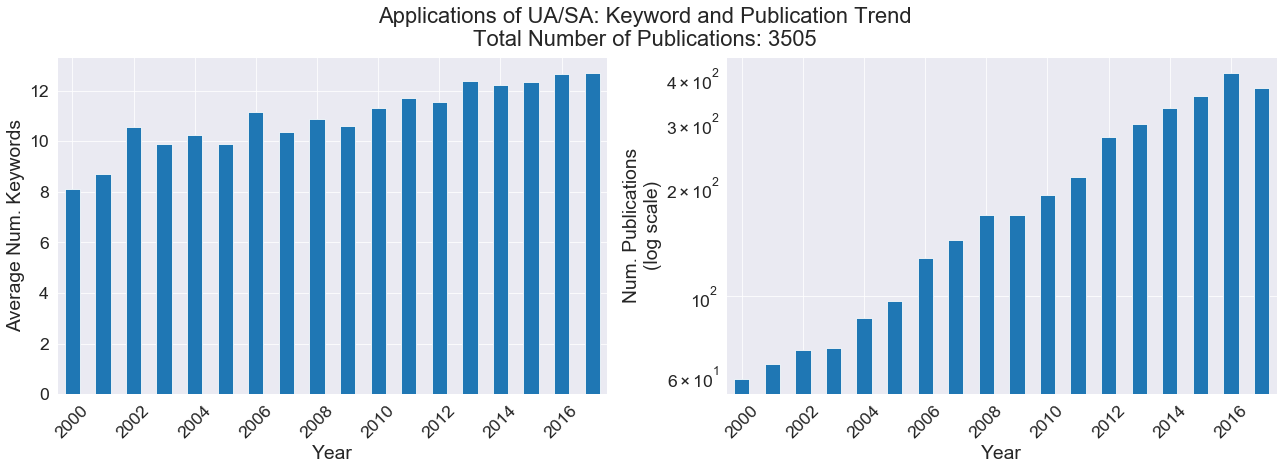

In [47]:
wos_plot.plot_kw_trend(all_applications, title='Applications of UA/SA: Keyword and Publication Trend', save_plot_fn='figs/app_pub_trend.png')

Trends

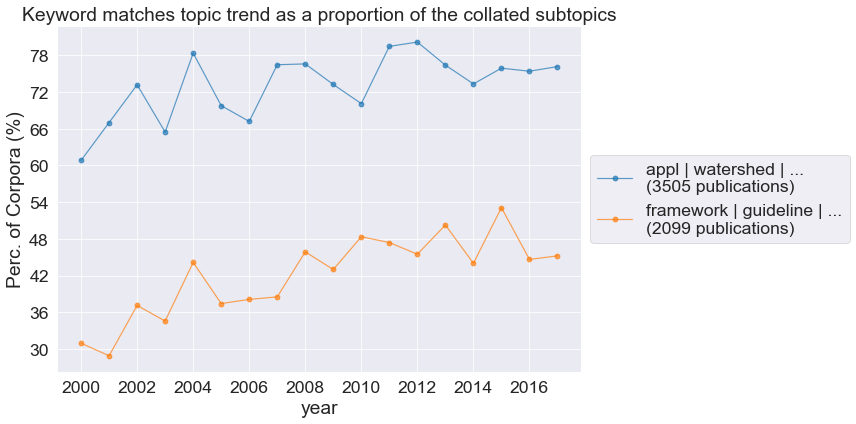

In [48]:
wos_plot.plot_topic_trend([applications, framework], total_rc=subtopics_combined, title='Keyword matches topic trend as a proportion of the combined subtopics', save_plot_fn='figs/combined_topics_keyword_trend_percentage.png')

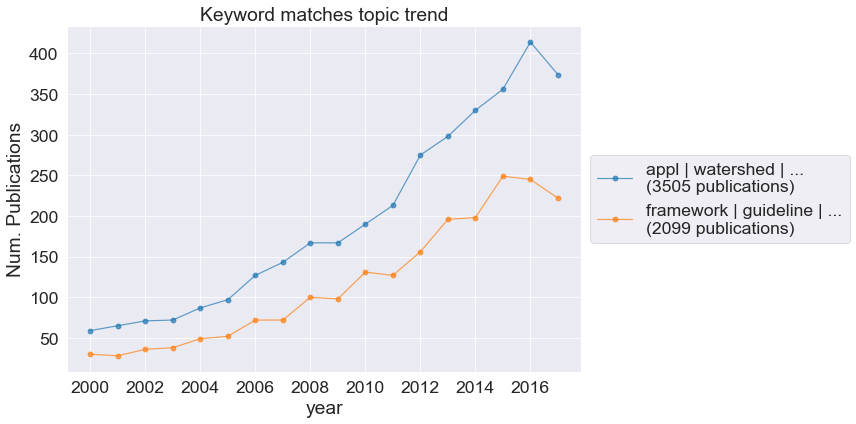

In [49]:
wos_plot.plot_topic_trend([applications, framework], title='Keyword matches topic trend', save_plot_fn='figs/combined_topics_keyword_trend.png')

Top cited journals
<br> 1. Framework

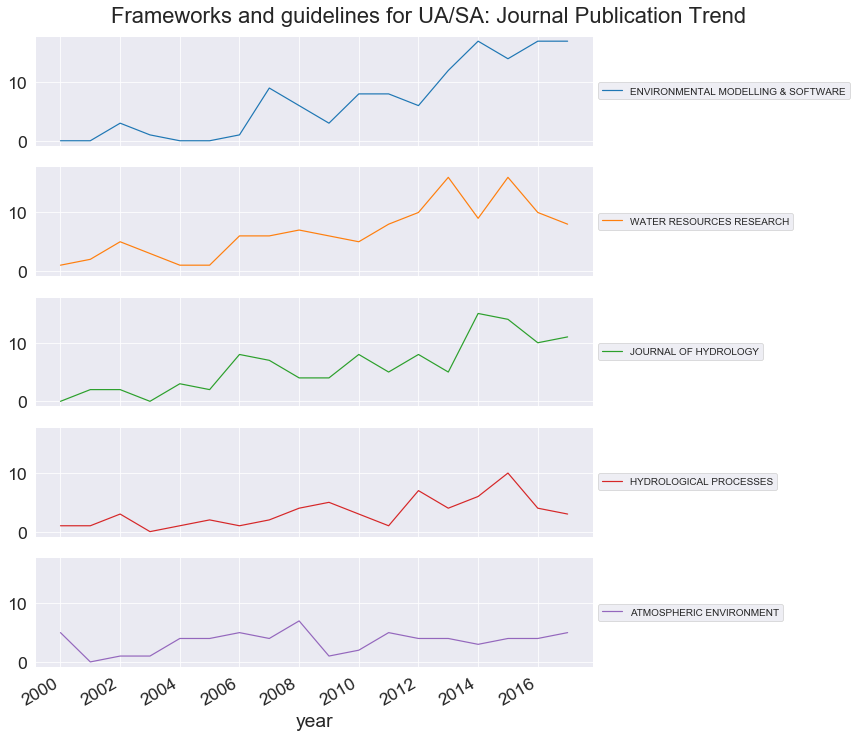

In [50]:
wos_plot.plot_journal_pub_trend(all_framework, top_n=5, save_plot_fn='figs/framework_journal_pub_trend.png', title='Frameworks and guidelines for UA/SA: Journal Publication Trend')

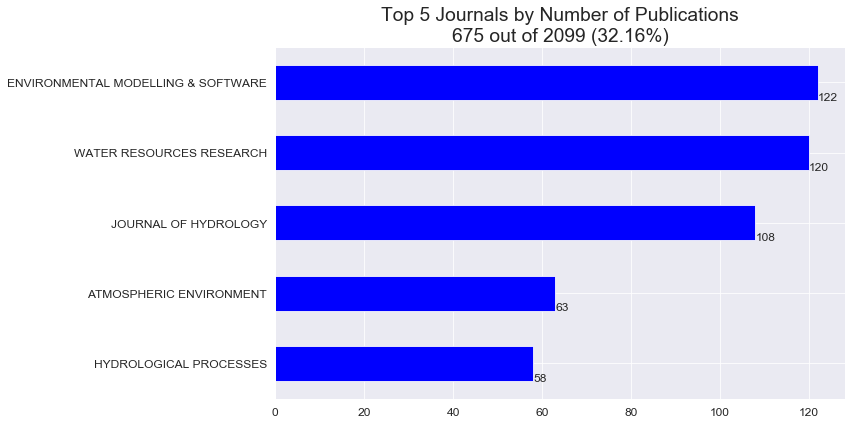

In [51]:
wos_plot.plot_pubs_per_journal(all_framework, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/framework_journal_pubs.png')

In [52]:
journals_of_interest_framework = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Water Resources Research'.upper(), 'Atmospheric Environment'.upper(), 'Hydrological Processes'.upper()]
pubs_for_journals_framework = wosis.find_pubs_by_journal(all_framework, journals_of_interest_framework)

In [78]:
data_dir = "tmp1"  # Using the temporary data directory

# Get citations for each paper
paper_citations_per_journal_framework = {}
for pubs in pubs_for_journals_framework:
    paper_citations_per_journal_framework[pubs] = wosis.get_num_citations(pubs_for_journals_framework[pubs], wos_config, 
                                                                    cache_dir=data_dir)

Authenticated (SID: 8AvNtyy5CfLfwBP2ZS5)



Authenticated (SID: 7CZkP6UqOAvIQ3AOVOi)



Authenticated (SID: 7DfyC2uiRS7asr8lqki)



Authenticated (SID: 6DwCzQYpOiOnA7PsLjw)



Authenticated (SID: 8Aah6dLu1tuidW7nmCY)


In [79]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_framework = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_framework.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_framework = collection_framework.append(df[cols_of_interest][0:10], ignore_index=True)

In [80]:
top_cited_in_top_journals_framework = collection_framework.sort_values('citations', ascending=False)
top_cited_in_top_journals_framework.head(10)

,AU,year,title,journal,citations,DOI link
20,"Bennett, Neil D.|Croke, Barry F. W.|Guariso, G...",2013,Characterising performance of environmental mo...,ENVIRONMENTAL MODELLING & SOFTWARE,581,https://dx.doi.org/10.1016/j.envsoft.2012.09.011
21,"Refsgaard, Jens Christian|van der Sluijs, Jero...",2007,Uncertainty in the environmental modelling pro...,ENVIRONMENTAL MODELLING & SOFTWARE,509,https://dx.doi.org/10.1016/j.envsoft.2007.02.004
22,"Merritt, WS|Letcher, RA|Jakeman, AJ",2003,A review of erosion and sediment transport models,ENVIRONMENTAL MODELLING & SOFTWARE,407,https://dx.doi.org/10.1016/S1364-8152(03)00078-1
0,"Yang, Jing|Reichert, Peter|Abbaspour, K. C.|Xi...",2008,Comparing uncertainty analysis techniques for ...,JOURNAL OF HYDROLOGY,312,https://dx.doi.org/10.1016/j.jhydrol.2008.05.012
10,"Russell, A|Dennis, R",2000,NARSTO critical review of photochemical models...,ATMOSPHERIC ENVIRONMENT,290,https://dx.doi.org/10.1016/S1352-2310(99)00468-9
30,"Gupta, Hoshin V.|Wagener, Thorsten|Liu, Yuqiong",2008,Reconciling theory with observations: elements...,HYDROLOGICAL PROCESSES,270,https://dx.doi.org/10.1002/hyp.6989
40,"Thiemann, M|Trosset, M|Gupta, H|Sorooshian, S",2001,Bayesian recursive parameter estimation for hy...,WATER RESOURCES RESEARCH,239,https://dx.doi.org/10.1029/2000WR900405
31,"Aronica, G|Bates, PD|Horritt, MS",2002,Assessing the uncertainty in distributed model...,HYDROLOGICAL PROCESSES,215,https://dx.doi.org/10.1002/hyp.398
1,"Kuczera, George|Kavetski, Dmitri|Franks, Stewa...",2006,Towards a Bayesian total error analysis of con...,JOURNAL OF HYDROLOGY,182,https://dx.doi.org/10.1016/j.jhydrol.2006.05.010
11,"Li, Xian-Xiang|Liu, Chun-Ho|Leung, Dennis Y. C...",2006,Recent progress in CFD modelling of wind field...,ATMOSPHERIC ENVIRONMENT,181,https://dx.doi.org/10.1016/j.atmosenv.2006.04.055


In [83]:
top_cited_in_top_journals_framework.to_csv('../data/top_cited_in_top_journals_framework.csv', index=False)

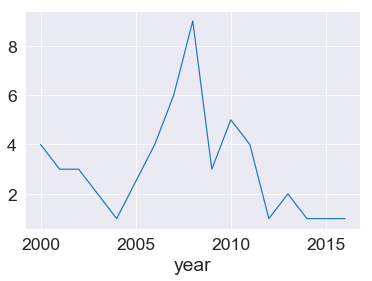

In [98]:
top_cited_in_top_journals_framework.groupby('year').count()['AU'].plot()

2. Applications

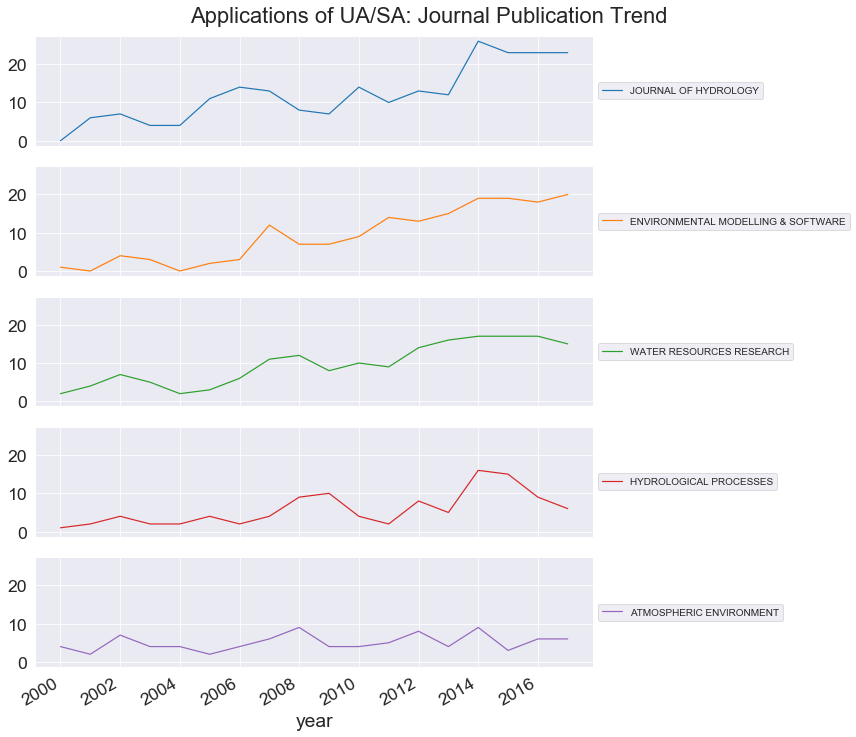

In [85]:
wos_plot.plot_journal_pub_trend(all_applications, top_n=5, save_plot_fn='figs/applications_journal_pub_trend.png', title='Applications of UA/SA: Journal Publication Trend')

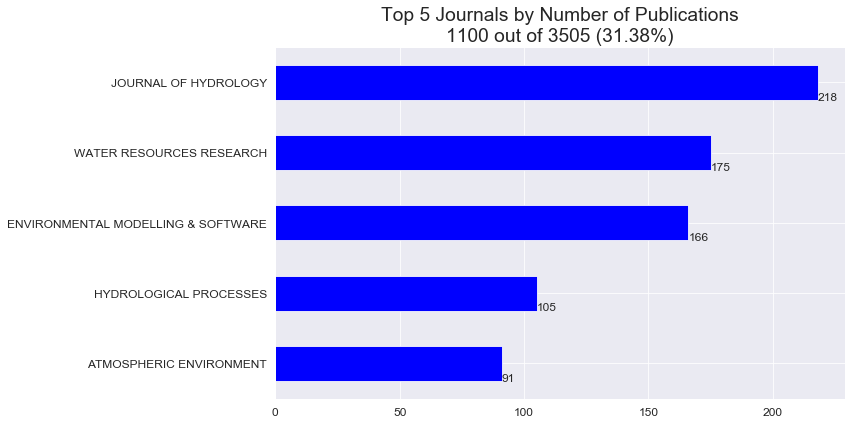

In [86]:
wos_plot.plot_pubs_per_journal(all_applications, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/app_journal_pubs.png')

In [87]:
journals_of_interest_app = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Water Resources Research'.upper(), 'Hydrological Processes'.upper(), 'Atmospheric Environment'.upper()]
pubs_for_journals_app = wosis.find_pubs_by_journal(all_applications, journals_of_interest_app)

In [88]:
data_dir = "tmp2"  # Using the temporary data directory

paper_citations_per_journal_app = {}
for pubs in pubs_for_journals_app:
    paper_citations_per_journal_app[pubs] = wosis.get_num_citations(pubs_for_journals_app[pubs], wos_config, 
                                                                    cache_dir=data_dir)

Authenticated (SID: 5As4aZbDhaYdghvfWjy)



Authenticated (SID: 6FEYodSyCZ1kL9jO72F)



Authenticated (SID: 8A47GHbHei8wDe7FOZj)



Authenticated (SID: 6Eoa7dUrSUTqMnKwL8t)



Authenticated (SID: 8EvmqRURrPztwwA6u84)


In [89]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_app = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_app.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_app = collection_app.append(df[cols_of_interest][0:10], ignore_index=True)

In [90]:
top_cited_in_top_journals_app = collection_app.sort_values('citations', ascending=False)
top_cited_in_top_journals_app.head(10)

,AU,year,title,journal,citations,DOI link
10,"Bennett, Neil D.|Croke, Barry F. W.|Guariso, G...",2013,Characterising performance of environmental mo...,ENVIRONMENTAL MODELLING & SOFTWARE,581,https://dx.doi.org/10.1016/j.envsoft.2012.09.011
11,"Refsgaard, Jens Christian|van der Sluijs, Jero...",2007,Uncertainty in the environmental modelling pro...,ENVIRONMENTAL MODELLING & SOFTWARE,509,https://dx.doi.org/10.1016/j.envsoft.2007.02.004
20,"Vardoulakis, S|Fisher, BEA|Pericleous, K|Gonza...",2003,Modelling air quality in street canyons: a review,ATMOSPHERIC ENVIRONMENT,486,https://dx.doi.org/10.1016/S1352-2310(02)00857-9
12,"Merritt, WS|Letcher, RA|Jakeman, AJ",2003,A review of erosion and sediment transport models,ENVIRONMENTAL MODELLING & SOFTWARE,407,https://dx.doi.org/10.1016/S1364-8152(03)00078-1
0,"Oudin, L|Hervieu, F|Michel, C|Perrin, C|Andrea...",2005,Which potential evapotranspiration input for a...,JOURNAL OF HYDROLOGY,321,https://dx.doi.org/10.1016/j.jhydrol.2004.08.026
1,"Yang, Jing|Reichert, Peter|Abbaspour, K. C.|Xi...",2008,Comparing uncertainty analysis techniques for ...,JOURNAL OF HYDROLOGY,312,https://dx.doi.org/10.1016/j.jhydrol.2008.05.012
2,"Xu, Chong-yu|Gong, Lebing|Jiang, Tong|Chen, De...",2006,Analysis of spatial distribution and temporal ...,JOURNAL OF HYDROLOGY,305,https://dx.doi.org/10.1016/j.jhydrol.2005.11.029
30,"Gupta, Hoshin V.|Wagener, Thorsten|Liu, Yuqiong",2008,Reconciling theory with observations: elements...,HYDROLOGICAL PROCESSES,270,https://dx.doi.org/10.1002/hyp.6989
3,"Muleta, MK|Nicklow, JW",2005,Sensitivity and uncertainty analysis coupled w...,JOURNAL OF HYDROLOGY,259,https://dx.doi.org/10.1016/j.jhydrol.2004.09.005
40,"Pappenberger, F.|Beven, K. J.",2006,Ignorance is bliss: Or seven reasons not to us...,WATER RESOURCES RESEARCH,244,https://dx.doi.org/10.1029/2005WR004820


In [91]:
top_cited_in_top_journals_app.to_csv('../data/top_cited_in_top_journals_app.csv', index=False)

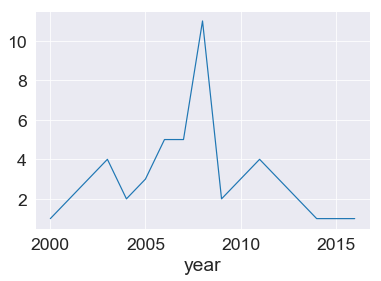

In [100]:
top_cited_in_top_journals_app.groupby('year').count()['AU'].plot()